# 1. Предобработка данных

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV, ElasticNetCV
from sklearn import metrics

%matplotlib inline

In [3]:
df = pd.read_csv('datasets/AB_NYC_2019.csv')
print('Размер выборки:', df.shape)
df.head()

Размер выборки: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


__Описание переменных:__

```
n – номер квартиры по порядку
price – цена квартиры в $1000
totsp – общая площадь квартиры, кв.м.
livesp жилая площадь квартиры, кв.м.
kitsp – площадь кухни, кв.м.
dist – расстояние от центра в км.
metrdist – расстояние до метро в минутах
walk – 1 – пешком от метро, 0 – на транспорте
brick 1 – кирпичный, монолит ж/б, 0 – другой
floor 1 – этаж кроме первого и последнего, 0 – иначе.
code – число от 1 до 8, при помощи которого мы группируем наблюдения по
подвыборкам:
1. Наблюдения сгруппированы на севере, вокруг Калужско-Рижской линии
метрополитена
2. Север, вокруг Серпуховско-Тимирязевской линии метрополитена
3. Северо-запад, вокруг Замоскворецкой линии метрополитена
4. Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена
5. Юго-восток, вокруг Люблинской линии метрополитена
6. Юго-восток, вокруг Таганско-Краснопресненской линии метрополитена
7. Восток, вокруг Калиниской линии метрополитена
8. Восток, вокруг Арбатско-Покровской линии метрополитена
```


Какие переменный категориальные? Какие непрерывные?

In [4]:
df.drop(['id', 'name', 'host_id', 'host_name', 'last_review'], axis=1, inplace=True)

In [5]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [6]:
df.info() # Посмотрим на информацию по типам переменных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [7]:
df.isnull().sum() # посмотрим, есть ли в данных (переменных) пропуски

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Устраняем пропуски данных заменой на среднее значение

In [8]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(), inplace=True)

In [9]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<AxesSubplot:>

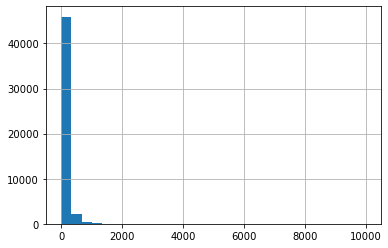

In [10]:
df.price.hist(bins=30)

<AxesSubplot:>

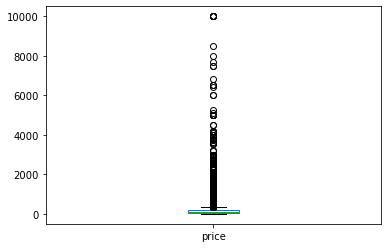

In [11]:
df.price.plot.box()

У распределения есть очень большая проблема - слишком длинный хвост. В выборке встречаются квартиры с довольно большой
стоимостью. Такие наблюдения называются выбросами. С ними нужно бороться, иначе наша модель подстроится под
них. Давайте сгладим распределение цен, прологарифмировав его. Так довольно часто поступают с целевой
переменной.

<AxesSubplot:>

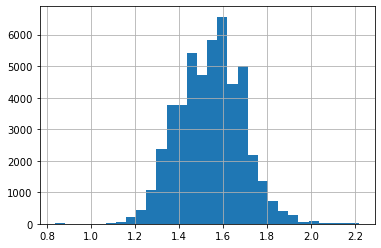

In [13]:
df['price'] = np.log(df['price'])
df.price.hist(bins=30)

<AxesSubplot:>

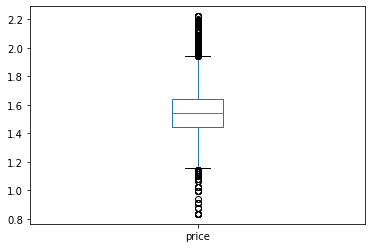

In [14]:
df.price.plot.box()

Посмотрим на распределение всех остальных признаков

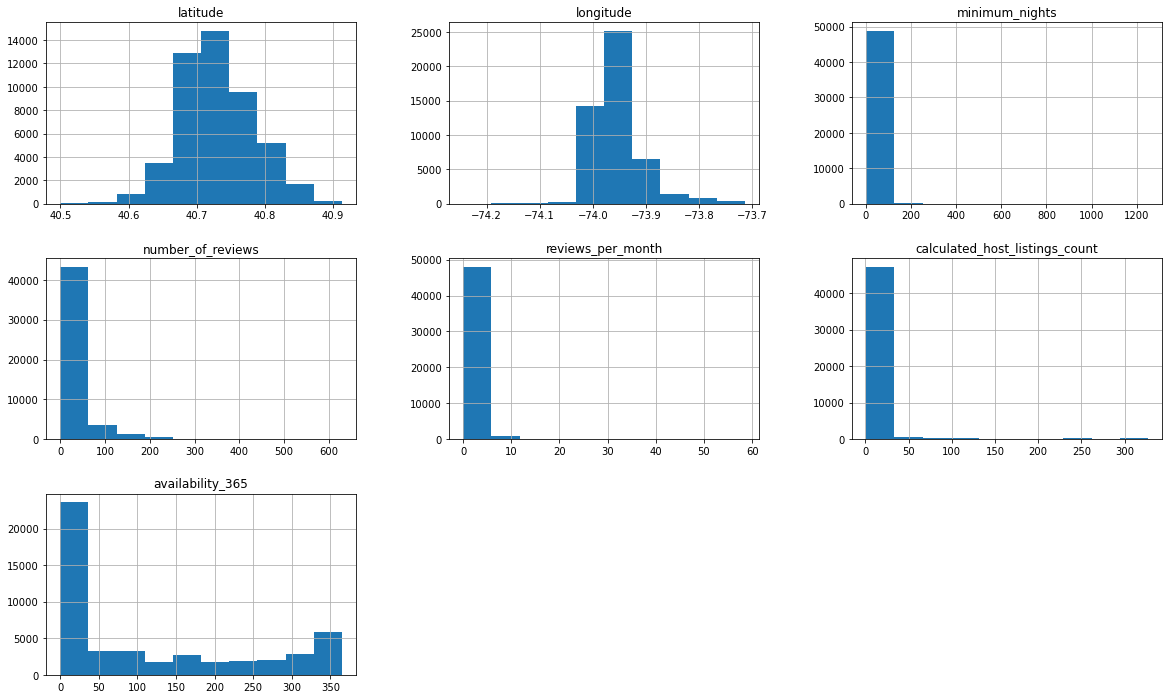

In [15]:
df.drop('price', axis=1).hist(figsize=(20, 12));

Кроме гистограм имеет смысл взглянуть на матрицу корреляций

<AxesSubplot:>

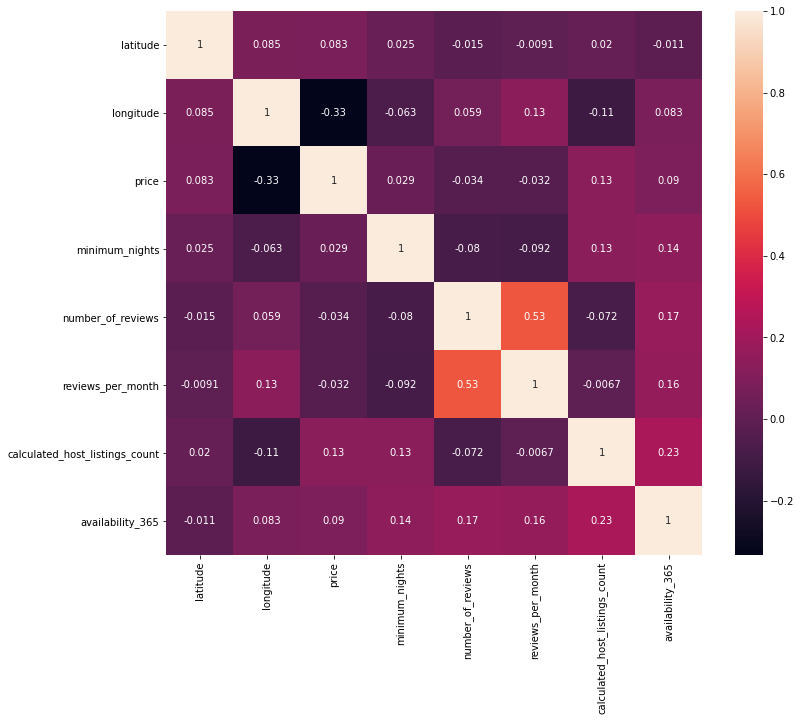

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)

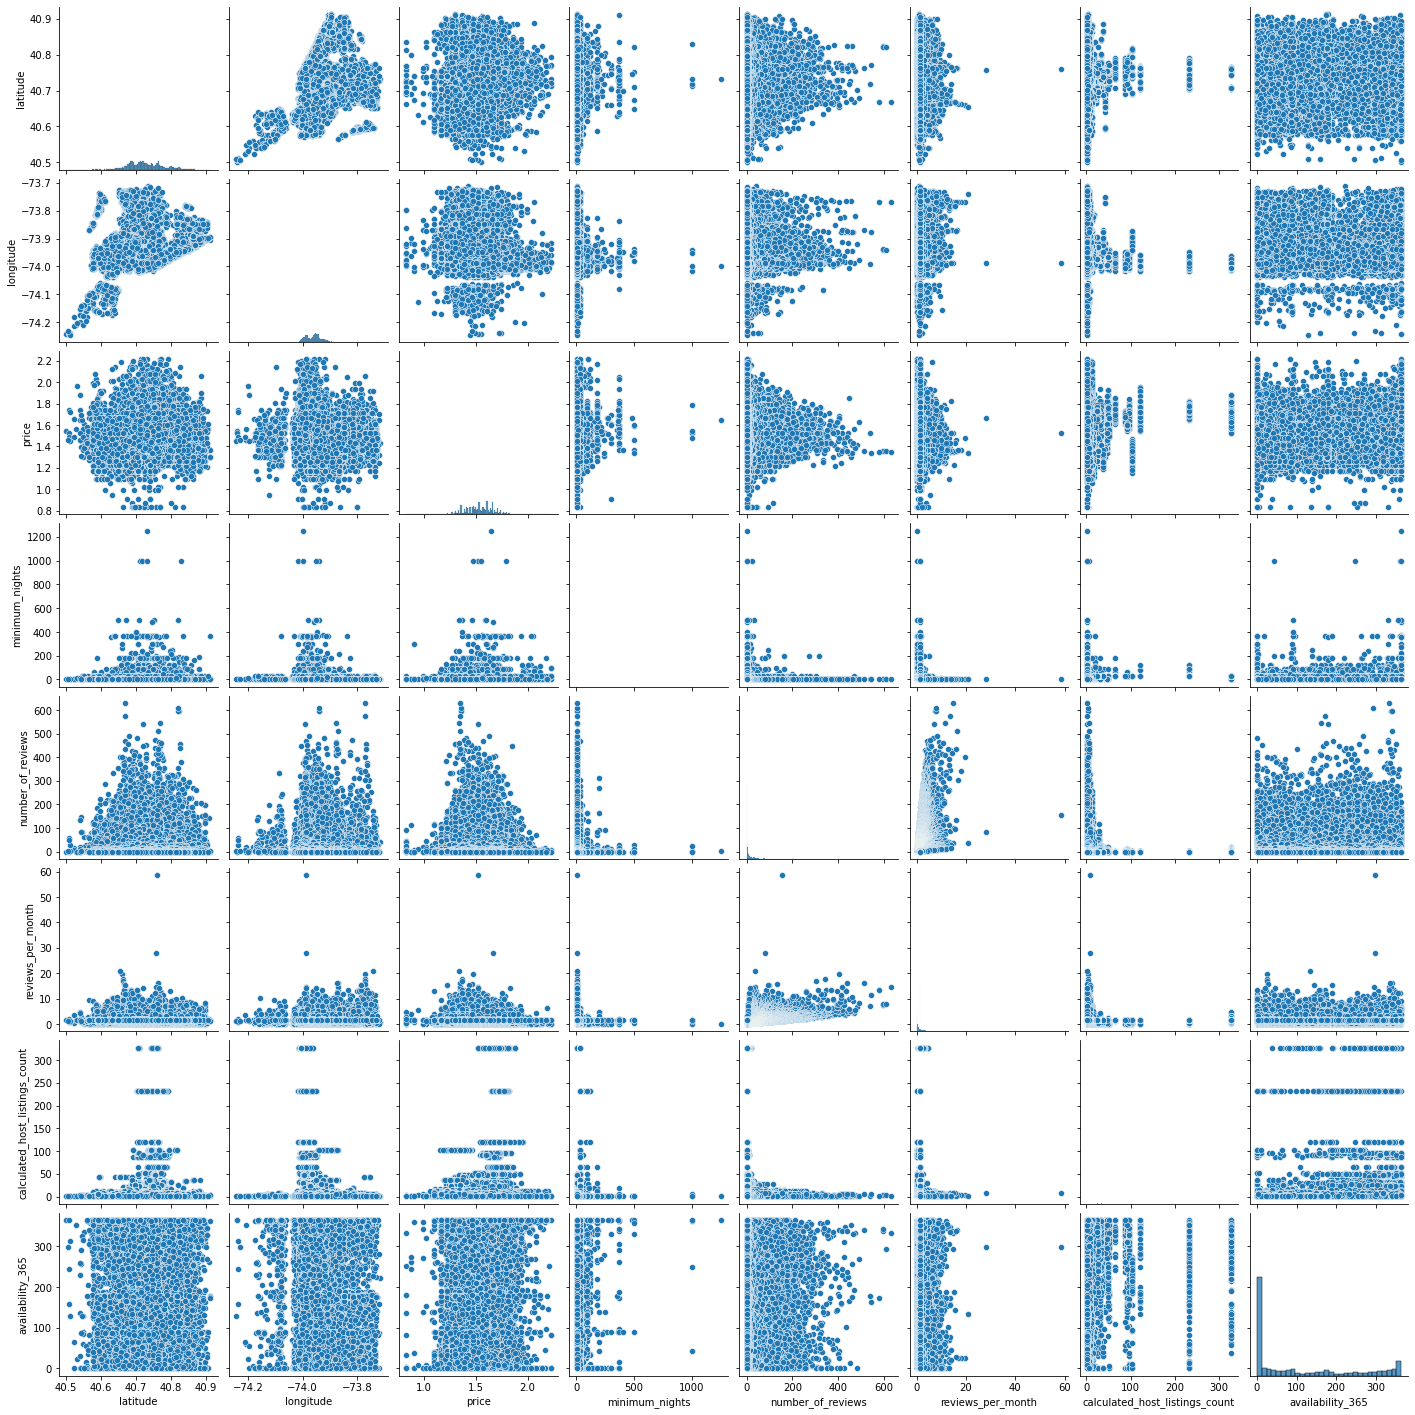

In [17]:
sns.pairplot(df)

# Предобработка категориальных признаков методом OneHotEncoding

Займемся предобработкой категориальных переменных при помощи одного горячего декодирования (One Hot Encoding)
При таком преобразовании категориальной переменной мы создаем столько новых столбцов, сколько различных значений этой
переменной у нас было. Обычно, при этом, левый столбец убирается, чтобы не создавать олинейно-зависимых столбцов.
Например, если у переменной "_погода_" есть три состояния "_хорошая_", "_средняя_" и "_нормальная_", то после _OneHotEncoding_ мы получим три столбца, где значения будут либо нулями, либо едеиницами, в зависимости от того,
какая погода была в этом наблюдении.

In [18]:
pd.DataFrame(['хорошая', 'средняя', 'нормальная'], columns=['weather'])

,weather
0,хорошая
1,средняя
2,нормальная


In [19]:
pd.get_dummies(pd.DataFrame(['хорошая', 'средняя', 'нормальная', 'хорошая'], columns=['weather']))

,weather_нормальная,weather_средняя,weather_хорошая
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1


In [20]:
ohe = OneHotEncoder() # Это OneHotEncoder из библиотеки sklearn

In [21]:
# Сделали OHE для категориальной переменной
df_caterog = pd.get_dummies(df['neighbourhood_group'], drop_first=True, prefix='group')

# Объединили назад наши таблички
df = pd.concat([df.drop('neighbourhood_group', axis=1), df_caterog], axis=1)

In [22]:
# Сделали OHE для категориальной переменной
df_caterog = pd.get_dummies(df['neighbourhood'], drop_first=True, prefix='neighbourhood')

# Объединили назад наши таблички
df = pd.concat([df.drop('neighbourhood', axis=1), df_caterog], axis=1)

In [23]:
# Сделали OHE для категориальной переменной
df_caterog = pd.get_dummies(df['room_type'], drop_first=True, prefix='room_type')

# Объединили назад наши таблички
df = pd.concat([df.drop('room_type', axis=1), df_caterog], axis=1)

In [24]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,group_Brooklyn,group_Manhattan,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,1.610227,1,9,0.210000,6,365,1,0,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,1.689376,1,45,0.380000,2,355,0,1,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,1.611563,3,0,1.373221,1,365,0,1,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,1.501549,1,270,4.640000,1,194,1,0,...,0,0,0,0,0,0,0,0,0,0
4,40.79851,-73.94399,1.477511,10,9,0.100000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Делим данные на тренировочные и тестовые. 30% данных откладываем для тестирования модели.
70% берем для обучения.

In [25]:
df_train, df_test = train_test_split(df, test_size=0.3)

Последний штрих предобработки данных это скалирование (стандартизация непрерывных переменных). Зачем это делают:
Обычно, когда обучают модель, хотят минимизировать ошибку, которую она допускает. Чаще всего эту ошибку 
минимизируют численно. Если переменные измерены в разныш шкалах (что-то в тоннах, что-то в годах и т.д.), 
алгоритм может при обучении заблудиться. Хорошо бы направить его и подтолкнуть в нужном направлении. 
Таким толчком является стандартизация переменных.

Из кажной переменной вычетают среднее и делят на стандартное отклонение. Это очищает переменные от своих
уникальных шкал и упрощает путь алгоритма к оптимальной точке. Обычно стандартное отклонение и среднее для
скалирования оценивают на обучающей выборке. К тестовой применяют уже оценённый результат. Это позволяет не
подглядывать в тестовую часть и не улучшать за счёт этого подглядывания прогнозы.

In [47]:
# Объявили скалировщик
scaler = StandardScaler()

# Учим скалировщик скалировать все переменные на train set
scaler.fit(df_train[['latitude', 'longitude', 'minimum_nights', 'longitude', 'number_of_reviews']])

StandardScaler()

In [48]:
# Применяем скалировщик к train set
df_train_scale = scaler.transform(df_train[['latitude', 'longitude', 'minimum_nights', 'longitude', 'number_of_reviews']])

# Применяем скалировщик к test set
df_test_scale = scaler.transform(df_test[['latitude', 'longitude', 'minimum_nights', 'longitude', 'number_of_reviews']])

In [49]:
# Заменяем значения на отскалированные
df_train[['latitude', 'longitude', 'minimum_nights', 'longitude', 'number_of_reviews']] = df_train_scale
df_test[['latitude', 'longitude', 'minimum_nights', 'longitude', 'number_of_reviews']] = df_test_scale

## Все переменные теперь выглядят проскалированными

In [50]:
# Cмотрим, что получилось
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,group_Brooklyn,group_Manhattan,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
28618,0.344804,-1.035485,1.610227,-0.148304,-0.451669,0.320000,-0.185900,-0.852974,0,1,...,0,0,0,0,0,0,0,0,0,0
18741,-0.131081,-0.992267,1.358877,-0.196608,-0.496890,0.030000,-0.185900,-0.852974,0,1,...,0,0,0,0,0,0,0,0,1,0
7531,-0.026427,0.243100,1.581000,1.107592,-0.406449,0.100000,1.358213,1.743170,1,0,...,0,0,0,0,0,0,0,0,0,0
39558,0.362734,1.558636,1.156269,1.107592,-0.519500,1.373221,2.902327,0.999246,0,0,...,0,0,0,0,0,0,0,0,1,0
24768,-0.947094,0.431744,1.667389,-0.244911,0.633621,2.150000,-0.185900,0.111091,1,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_train.isnull().sum()

latitude                  0
longitude                 0
price                     8
minimum_nights            0
number_of_reviews         0
                         ..
neighbourhood_Woodlawn    0
neighbourhood_Woodrow     0
neighbourhood_Woodside    0
room_type_Private room    0
room_type_Shared room     0
Length: 234, dtype: int64

In [52]:
# Смотрим на размеры train и test
print(df_train.shape)
print(df_test.shape)

(34226, 234)
(14669, 234)


In [53]:
# Выстаскиваем цены и параметры квартир по разным переменным для удобства
y_train = df_train.price
y_test = df_test.price

X_train = df_train.drop('price', axis=1).values
X_test = df_test.drop('price', axis=1).values

# 2. Константный прогноз

Шаг первый. Построим константный прогноз. Будем говорить, что стоимость любой квартиры равна среднему значению.
Это самый глупый прогноз, который мы можем сделать. Мы будем сравнивать с ним прогнозы более сложных моделей.

In [54]:
y_mean = np.mean(y_train) # Посчитали среднее
y_pred_naive = np.ones(len(y_test)) * y_mean # Спрогнозировали им цены всех квартир в тестовой выборке
y_pred_naive[:5]

array([1.54228834, 1.54228834, 1.54228834, 1.54228834, 1.54228834])

In [55]:
print(f'Прогноз цены квартиры в $: {np.exp(1.54249149)}K$')

Прогноз цены квартиры в $: 4.67622654080797K$


# 3. Метрики качества для регрессии

Мы сделали выше прогноз. Теперь хотим понять, насколько он хороший. Для этого обычно используют метрики.
Посмотрим на несколько таких метрик.

Первой метрикой, с которой мы познакомимся будет MAE (mean absolute error), средняя абсолютная ошибка. Она
вычисляется следующим образом. 
$$ MAE = \frac{1}{n}\sum_{i=1}^{n} |y_i - \hat{y}_i|. $$
Если мы спрогнозировали,что квартира стоит 20 рублей, а она стоила 10 рублей, мы ошиблись |10 - 20| = 10рублей.
Средняя абсолютная ошибка это средняя сумма рублей, на которую мы ошиблись.

In [57]:
metrics.mean_absolute_error(y_test, y_pred_naive)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive))

Второй метрикой является MSE (mean squared error), средняя квадратическая ошибка. Она вычисляется так
$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2. $$

Смысл этой ошибкив том, чтобы штрафовать ща большие ошибки сильнее, чем за маленькие. Если мы ошиблись на 5,
то в ошибку пойдёт 25, если мы ошиблись на 10, то в ошибку пойдет 100. Чем выше олшибка, тем сильнее штраф.

In [ ]:
metrics.mean_squared_error(y_test, y_pred_naive)

По аналогии перейдём к долларам:

In [ ]:
metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive))

Получилось многовато. Всё дело в том, что это не просто доллары, а квадратичные доллары, т.к. мы суммировали квадраты.
Чтобы вернуться к обычным, нужно из MSE извлечь квадратный корень. Тогда получится новая ошибка RMSE.
Root Mean Squared Error

In [ ]:
np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive)))

Ошибка в среднем более чем на 60 тысяч долларов. Так как более большие ошибки входят с большим весом, вполне логично,
что RMSE получилась больше, чем MAE.

Часто для нас принципиальным является не то, на сколько денег мы ошиблись, а то, на сколько процентов мы ошиблись.
Метрика, которая отлавливает процентную ошибку, называется MAPE (Mean Absolute Percentage Error), средняя абсолютная
процентная ошибка.
$$
MAPE = \frac{1}{n} \sum_{i=1}^n \frac{|y_i - \hat{y}_i|}{y_i}
$$
Она часто применяется в следующих задачах: например, вы прогнозируете спрос, и вам принципиально, на сколько процентов вы ошиблись, а не абсолютное значение. Если вы предсказали один, а в реальности было десять - это не то же самое, что вы предсказали тысяча, а в реальности было тысяча девять. С точки зрения MAE или MSE, это две совершенно одинаковые ошибки. А если вас интересует, сколько в среднем на сколько процентов вы ошибаетесь, то это отражает MAPE.

Её нам придется реализовывать самостоятельно. Благо, это не очень трудно.

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, Y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f' Средняя ошибка {mean_absolute_percentage_error(y_test, y_pred_naive):.2f}% от цены')

Еще одна метрика это коэффициент детерминации, $R^2$. Он отражает то, какую долю дисперсии объявсняемой переменной, мы должны объяснить с помощью нашей модели:
$$ R^2 =1- \frac{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{ \frac{1}{n}\sum_{i=1}^{n} (y_i - \bar{y}_i)^2} $$
Эту метрику очень сильно любят консалтеры и аудиторы, потому, что только её они знают. На самом деле в ней нет
ничего хорошего. При добавлении в модель новых переменных она всегда растет. У нее есть ещё несколько тонких математических недостатков, о которых можно узнать из книг.

In [ ]:
metrics.r2_score(y_test, y_pred_naive)

In [ ]:
def print_metrics(y_test, y_pred):
    print(f'MAE: {metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred))}')
    print(f'MSE: {np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred)))}')
    print(f'R2: {metrics.r2_score(y_test, y_pred)}')
    print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
    pass

In [ ]:
print_metrics(y_test, y_pred_naive)

# 3. Строим нашу первую регрессию

Пришло время построить линейную регрессию! Эта модель говорит, что цена на квартиру формируется в результате
суммирования тех характеристик, которыми она обладает с какими-то весами
$$\hat y = \beta_{0} + \beta_{1}x_{1}+...+\beta_{n}x_{n}.$$
Например, если мы оценили модель и получилось, что
$$price = 10000 + 20 \cdot totsp$$
то это означает, что средняя стоимость квартиры равна 10 тыс. долларам. При этом каждый дополнительный метр общей площади квартиры делает её дороже на 20 рублей.

Для того, чтобы обучить регрессию минимизируют одну из метрик, перечисленных в прошлом разделе. В базовой комплектации
регресии это делают с MSE. Такая модель обладает огромным колдичеством няшных статических свойств.

In [ ]:
# Объявили модель
model_regression = LinearRegression()

# Обучим модель на тренировойной выборке
model_regression.fit(X_train, y_train)
# Сделали прогнозы на тестовой выборке
y_pred_regr = model_regression.predict(X_test)

___Посмотрим на качество прогнозов___

In [ ]:
print_metrics(y_test, y_pred_naive)

In [ ]:
print_metrics(y_test, y_pred_regr)

___Посмотрим на то, какие признаки вносят в цену наибольший вклад___

In [ ]:
featureImportance = pd.DataFrame({'feature': df.drop('price', axis=1).columns,
                                'importance': model_regression.coef_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['importance'], ascending=False, inplace=True)
featureImportance['importance'].plot(kind='bar', figsize=(10, 6));

# 4. Строим LASSO регресиию

Построим более сложную модель LASSO регрессию. ФИшка этой модели в том, что она автоматически зануляет лишние 
коэффициенты.

In [ ]:
# Объявляем модель
model_simpelasso = Lasso()

# Обучаем модель на тренировочной выборке
model_simpelasso.fit(X_train, y_train)

# Делаем прогнозы на тестовой выборке
y_pred_lasso = model_simpelasso.predict(X_test)

___Посмотрим на важность факторов для стоимости квартиры___

In [ ]:
featureImportance = pd.DataFrame({'feature': df.drop('price', axis=1).columns,
                                'importance': model_simpelasso.coef_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['importance'], ascending=False, inplace=True)
featureImportance['importance'].plot(kind='bar', figsize=(10, 6));

In [ ]:
print_metrics(y_test, y_pred_naive)

In [ ]:
print_metrics(y_test, y_pred_lasso)

Важных факторов нет, всё занулилось. Метрики качества такие же, как при константном прогнозе. Почему такое произошло?
Дело в том, что у модели есть гиперпараметр - сила зануления. И его нужно подбирать мектодом перебора. В нашей 
модели он стоял слишком большим. Давайте попробуем подобрать этот параметр.

# 5. Подбор гиперпатаметра для Lasso регресии

Будем делать перебор следующим способом: дробим тренировочную выбрку на 5 частей. На четырех учим модель,
на пятой прогнозируем. Смотрим на качество. И так по очереди выделяем для прогноза каждую из 5 частичек. Потом
качество прогноза усредняем - кросс-валидация. Для какого параметра из решетки качество получится наибольшам, тот и
оставим.

In [ ]:
# Решетка для перебора параметров
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 1]}

# Объявляем модель
model_lasso = Lasso()

# Объявили перебор
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv=5)
grid_cv_lasso.fit(X_train, y_train)
print(f'Лучшее значение параметра aplha: {grid_cv_lasso.best_params_}')

# Сделаем прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

___При параметре alpha = 0.001 качества у прогноза получилось самым хорошим. Его и берем. Посмотрим на важность
переменных.___

In [ ]:
# Объявляем модель
model_simpelasso = Lasso(0.001)

# Обучаем модель на тренировочной выборке
model_simpelasso.fit(X_train, y_train)

# Делаем прогнозы на тестовой выборке
y_pred_lasso = model_simpelasso.predict(X_test)

In [ ]:
featureImportance = pd.DataFrame({'feature': df.drop('price', axis=1).columns,
                                'importance': model_simpelasso.coef_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['importance'], ascending=False, inplace=True)
featureImportance['importance'].plot(kind='bar', figsize=(10, 6));

___И качество модели оказывается близким к обычной регрессии. Судя по всему у нас в выборке нет лоишних параметров и
занулять нечего.___

In [ ]:
print_metrics(y_test, y_pred_lasso)

In [ ]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
print('Лучшее значение параметра:', lasso_cv.alpha_)

# Сделали прогнозы
y_pred_lasso_cv = lasso_cv.predict(X_test)

In [ ]:
featureImportance = pd.DataFrame({'feature': df.drop('price', axis=1).columns,
                                'importance': lasso_cv.coef_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['importance'], ascending=False, inplace=True)
featureImportance['importance'].plot(kind='bar', figsize=(10, 6));

In [ ]:
print_metrics(y_test, y_pred_lasso_cv)